In [409]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [410]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [411]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [412]:
corr_matrix = df.corr()

Text(0, 0.5, 'Color bar')

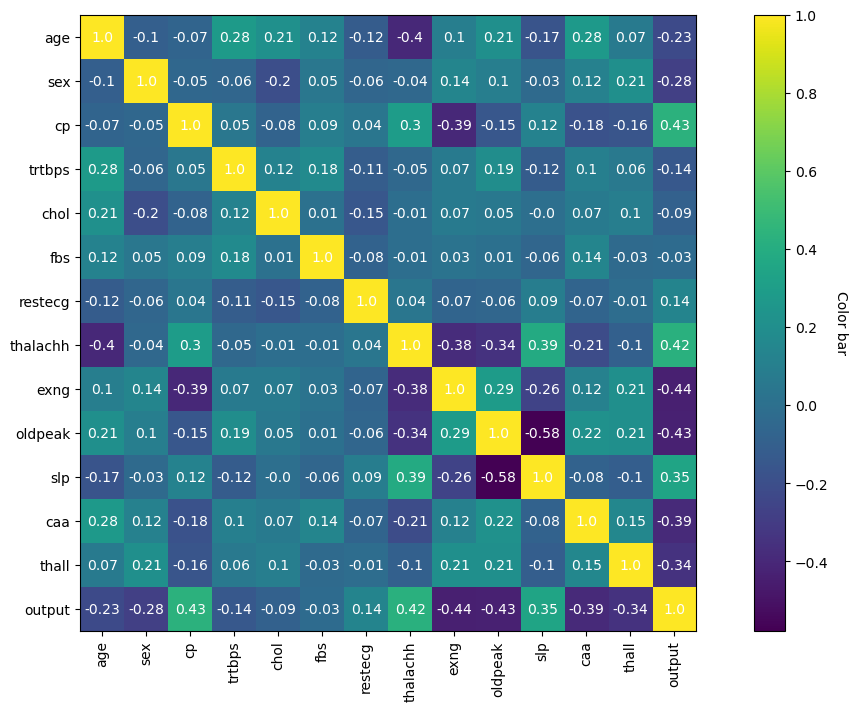

In [413]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

<Axes: >

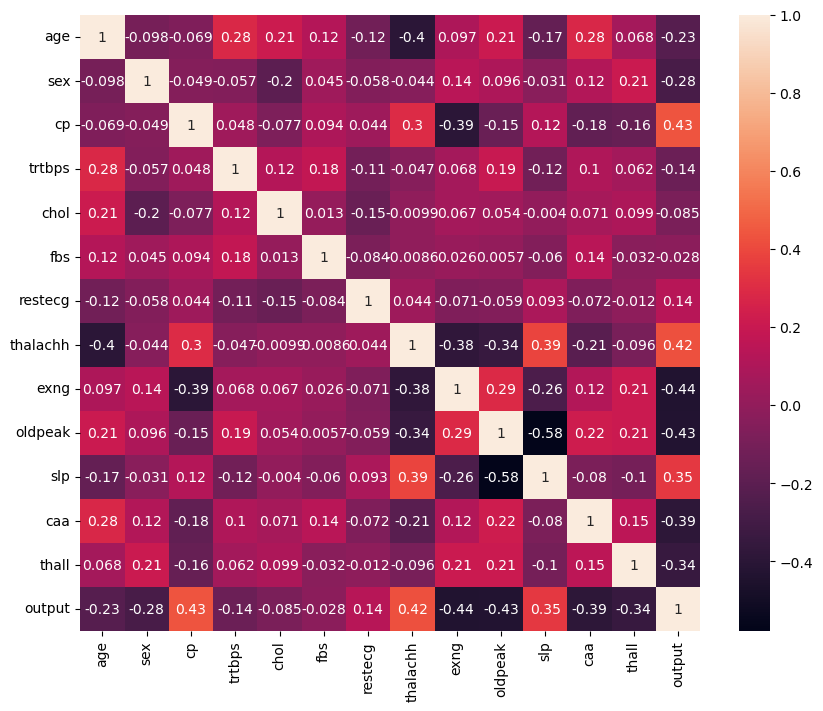

In [414]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [415]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

import random

df = df.drop(["chol", "fbs"],axis=1)

y = df["output"].copy()

x_train, x_test, y_train, y_test = train_test_split(df.drop(["output"],axis=1), y, test_size=0.2,random_state=random.seed(42))

In [416]:
from sklearn.discriminant_analysis import StandardScaler

ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# x_train=StandardScaler().fit_transform(x_train)
# x_test=StandardScaler().fit_transform(x_test)

### Creacion de la red neuronal

Imports

In [417]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import keras

In [418]:
dimension_entrada = x_train.shape[1]
dimension_salida = 1

modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada,activation="relu"))

dimension_entrada = x_train.shape[1]
dimension_salida = 1

modelo = Sequential()
modelo.add(Dense(20, input_dim=dimension_entrada, activation="relu"))
modelo.add(Dense(1, activation= "sigmoid"))

sgd = SGD(learning_rate=0.001)
modelo.compile(loss="binary_crossentropy",optimizer=sgd,metrics=["accuracy","precision","recall"])
modelo.summary()

c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_151 (Dense)               │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [419]:
epochs = 10000
batch_size = 20

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

# En validation_data, no se debe usar los datos de test, sino unos especificos para validacion. Debido a que tenemos muy pocos datos en este
# dataset, utilizamos los de test.

historia = modelo.fit(x_train,y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stopping_cb])

Epoch 1/10000


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3223 - loss: 0.8318 - precision: 0.3256 - recall: 0.1275 - val_accuracy: 0.3443 - val_loss: 0.7608 - val_precision: 0.0909 - val_recall: 0.0323
Epoch 2/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3481 - loss: 0.7936 - precision: 0.2876 - recall: 0.1279 - val_accuracy: 0.3443 - val_loss: 0.7570 - val_precision: 0.0909 - val_recall: 0.0323
Epoch 3/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3500 - loss: 0.8108 - precision: 0.2863 - recall: 0.1295 - val_accuracy: 0.3443 - val_loss: 0.7530 - val_precision: 0.0909 - val_recall: 0.0323
Epoch 4/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3795 - loss: 0.7806 - precision: 0.2891 - recall: 0.1060 - val_accuracy: 0.3443 - val_loss: 0.7493 - val_precision: 0.0909 - val_recall: 0.0323
Epoch 5/10000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3381 - loss: 0.8011 - precision: 0.3124 - recall: 0.1339 - val_accuracy: 0.3443 - val_loss: 0.7459 - v

### Representacion grafica

<Axes: >

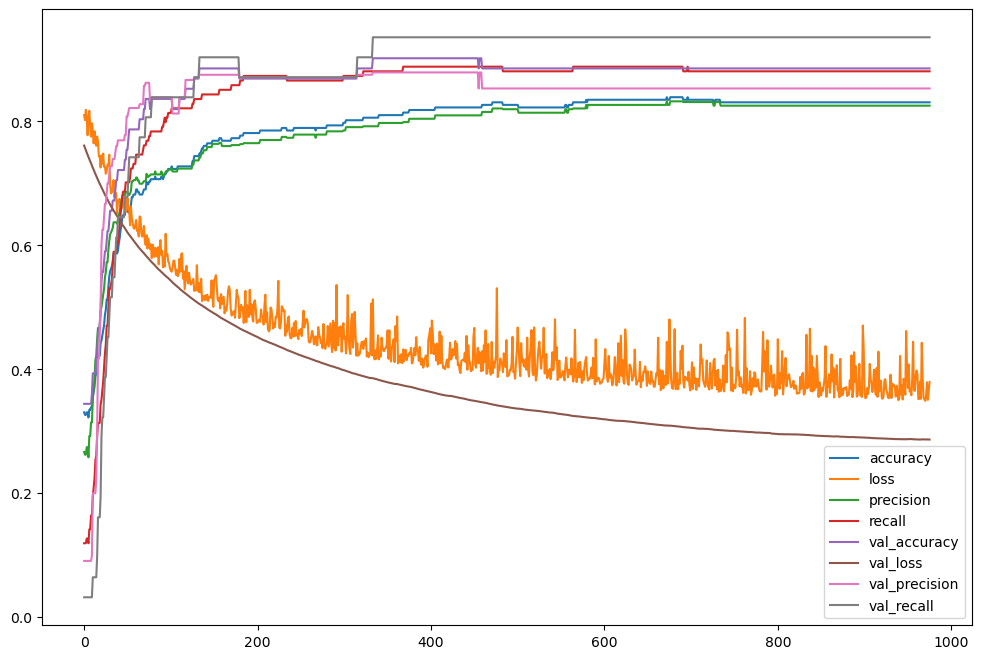

In [420]:
pd.DataFrame(historia.history).plot(figsize=(12,8))

In [421]:
mse_test = modelo.evaluate(x_test, y_test)
mse_test

# Con todas las columnas   lr = 0.005
# 2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8272 - loss: 0.4436 - precision: 0.7440 - recall: 0.8962 
# Quitando "chol", "fbs"   lr = 0.005
# 2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7736 - loss: 0.4269 - precision: 0.7639 - recall: 0.9113 
# Con todas las columnas   lr = 0.001
# 2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7637 - loss: 0.5363 - precision: 0.8156 - recall: 0.7175
# Quitando "chol", "fbs"   lr = 0.001
# 2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8600 - loss: 0.3484 - precision: 0.8577 - recall: 0.9058 



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8610 - loss: 0.2962 - precision: 0.8067 - recall: 0.9014 


[0.268829345703125, 0.8852459192276001, 0.8529411554336548, 0.9354838728904724]

In [422]:
X_nueva = x_test[:10]
y_nueva = modelo.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.6258973 ],
       [0.8129906 ],
       [0.01594103],
       [0.16705042],
       [0.88883406],
       [0.01692385],
       [0.9111653 ],
       [0.728577  ],
       [0.37926054],
       [0.88690096]], dtype=float32)